# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [20]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [9]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

weather_alldata = pd.concat([weather1, weather2], ignore_index=True) 

coffee_data= pd.read_csv("../data/crop/coffee_output.csv")


In [ ]:
# TODO: Merge these two dataframes together
combined_data_1 = pd.merge(coffee_data, weather_alldata, on="year", how="inner")
combined_data_2 = pd.merge(coffee_data, weather_alldata, on="year", how="outer")
combined_data_3 = pd.merge(coffee_data, weather_alldata, on="year", how="left")
combined_data_4 = pd.merge(coffee_data, weather_alldata, on="year", how="right")

print("Inner join shape:", combined_data_1.shape)
print("Outer join shape:", combined_data_2.shape)
print("Left join shape:", combined_data_3.shape)
print("Right join shape:", combined_data_4.shape)

# The inner join only keeps the years that appear in both coffee and weather data — so some years get dropped.
# The outer join keeps all years from both datasets, even if one dataset doesn’t have data for some years.
# The left join keeps all the years from the coffee data and adds weather info where it exists.
# The right join keeps all years from the weather data and adds coffee info where it exists.

# Need to focus on coffee, using the left join is usually best because you keep all coffee years and add weather data where available.

Inner join shape: (94, 20)
Outer join shape: (114, 20)
Left join shape: (114, 20)
Right join shape: (94, 20)


In [13]:
# TODO: View the first 5 rows of your data
combined_data_3.head()

,country,subdivision_x,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision_y
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# TODO: Check for null values 
combined_data_3.isnull().sum()

country                          0
subdivision_x                    0
type                             0
60kgs_bag                        0
year                             0
nonbearing_trees                 5
bearing_trees                    5
nonbear_hectares                 5
bearing_hectares                 5
bearing_trees_per_hectare        5
nonbearing_trees_per_hectare     5
rain_max                        20
temp_avg                        20
temp_max                        20
temp_min                        20
hum_max                         20
hum_min                         20
wind_max                        20
wind_avg                        20
subdivision_y                   20
dtype: int64

In [17]:
# TODO: Drop rows that contain null values
combined_data_3 = combined_data_3.dropna()


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

In [28]:
# Reference to remind myself the name of the columns
print(combined_data_3.columns)


Index(['country', 'subdivision_x', 'type', '60kgs_bag', 'year',
       'nonbearing_trees', 'bearing_trees', 'nonbear_hectares',
       'bearing_hectares', 'bearing_trees_per_hectare',
       'nonbearing_trees_per_hectare', 'rain_max', 'temp_avg', 'temp_max',
       'temp_min', 'hum_max', 'hum_min', 'wind_max', 'wind_avg',
       'subdivision_y'],
      dtype='object')


What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

The relationship between average temperature (temp_avg) and coffee output (60kgs_bag) was examined using Pearson’s correlation coefficient. The coefficient was -0.04, indicating a very weak negative correlation between temperature and coffee output.

The p-value was greater than 0.05, meaning the correlation is not statistically significant. This suggests there is no strong evidence of a meaningful relationship between average temperature and coffee production in this dataset.

The trend line on the scatter plot is almost flat ( zero = no correlation), and the heat map confirms this weak correlation with a value of -0.04. Overall, temperature does not appear to have a significant impact on coffee output here.

Pearson correlation coefficient between coffee output and temperature: -0.04
The correlation is not statistically significant (p >= 0.05).
Slope: -0.69, Intercept: 23.96


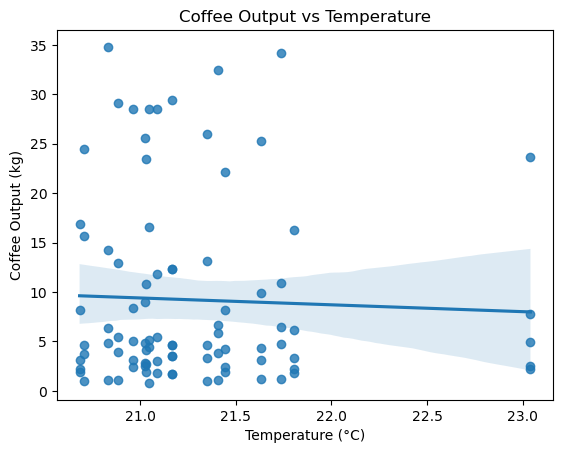

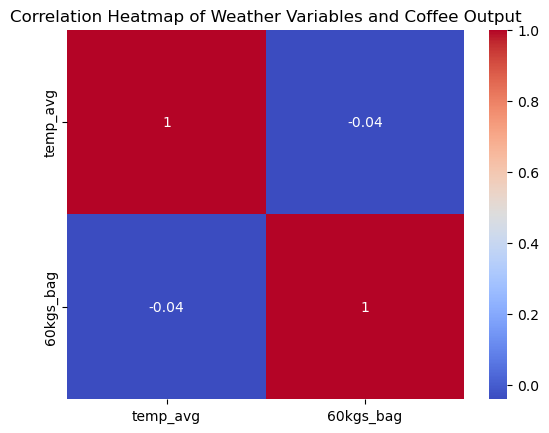

In [35]:
# Calculate Pearson correlation coefficients and p-values for each pair of variables
pearsonr_corr, p_value = pearsonr(combined_data_3['60kgs_bag'], combined_data_3['temp_avg'])
print(f"Pearson correlation coefficient between coffee output and temperature: {pearsonr_corr:.2f}")

# Interpret the p-value
if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Trendline
z = np.polyfit(combined_data_3['temp_avg'], combined_data_3['60kgs_bag'], 1)
p = np.poly1d(z)
slope = z[0]
intercept = z[1]
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")

# Scatter plot
sns.regplot(x='temp_avg', y='60kgs_bag', data=combined_data_3)
plt.title('Coffee Output vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Coffee Output (kg)')
plt.show()

### Heat map 
# Select relevant numeric columns for correlation
cols = ['temp_avg', '60kgs_bag']

# Calculate correlation matrix
corr_matrix = combined_data_3[cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Variables and Coffee Output')
plt.show()



What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

The Pearson correlation coefficient between minimum humidity and coffee output is -0.06, which indicates a very weak negative relationship. Since the p-value is greater than 0.05, this correlation is not statistically significant. This means there is no strong evidence to suggest that minimum humidity affects coffee output in this dataset.



Pearson correlation coefficient between coffee output and minimum humidity: -0.06
The correlation is not statistically significant (p >= 0.05).
Slope: -0.18651265859576327, Intercept: 9.779519807564165


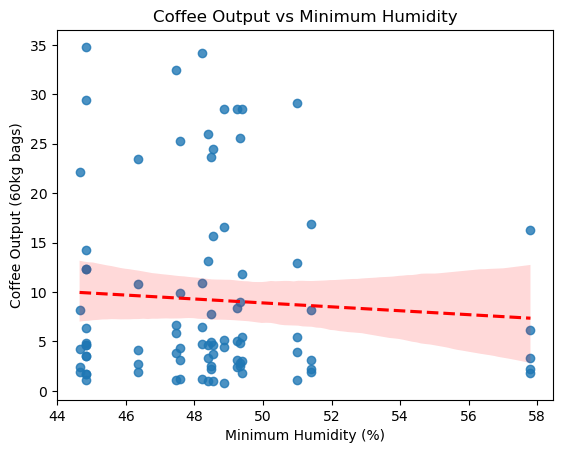

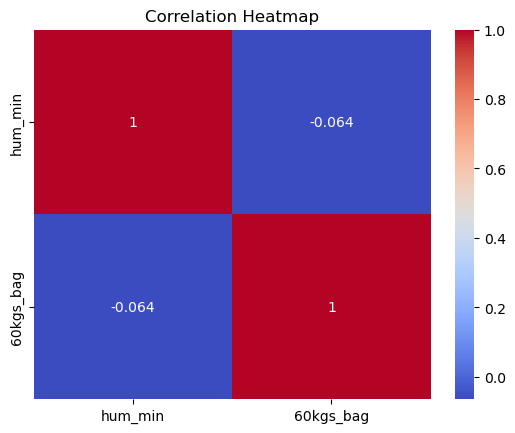

In [34]:
# Calculate Pearson correlation coefficient and p-value
pearsonr_corr, p_value = pearsonr(combined_data_3['hum_min'], combined_data_3['60kgs_bag'])
print(f"Pearson correlation coefficient between coffee output and minimum humidity: {pearsonr_corr:.2f}")

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Calculate slope and intercept of the trendline
z = np.polyfit(combined_data_3['rain_max'], combined_data_3['60kgs_bag'], 1)
slope = z[0]
intercept = z[1]
print(f"Slope: {slope}, Intercept: {intercept}")

# Scatter plot with trend line
sns.regplot(x='hum_min', y='60kgs_bag', data=combined_data_3, line_kws={"color":"red", "linestyle":"--"})
plt.title('Coffee Output vs Minimum Humidity')
plt.xlabel('Minimum Humidity (%)')
plt.ylabel('Coffee Output (60kg bags)')
plt.show()

# Optional: Heatmap for overall correlations
corr_matrix = combined_data_3[['hum_min', '60kgs_bag']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

The Pearson correlation coefficient between rain_max and coffee output is approximately -0.02, indicating a very weak negative relationship. This correlation is not statistically significant (p ≥ 0.05). The slope of the trendline is -0.19, which suggests a slight decreasing trend in coffee output as maximum rainfall increases, but the effect is very small and likely not meaningful.



Pearson correlation coefficient between rain_max and coffee output: -0.02
The correlation is not statistically significant (p >= 0.05).


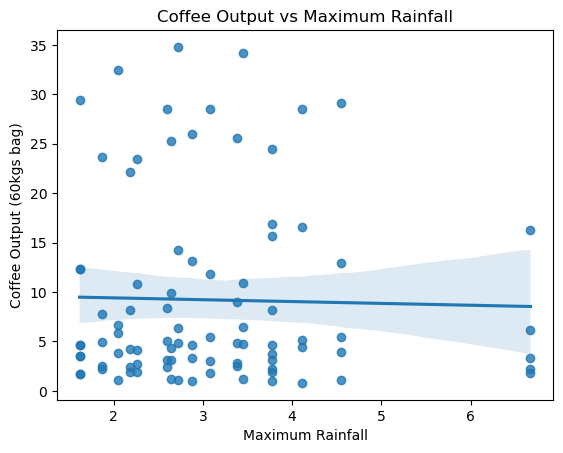

In [33]:
# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(combined_data_3['rain_max'], combined_data_3['60kgs_bag'])
print(f"Pearson correlation coefficient between rain_max and coffee output: {pearson_corr:.2f}")

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Plot with regression line
sns.regplot(x='rain_max', y='60kgs_bag', data=combined_data_3)
plt.title('Coffee Output vs Maximum Rainfall')
plt.xlabel('Maximum Rainfall')
plt.ylabel('Coffee Output (60kgs bag)')
plt.show()

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

The Pearson correlation coefficient between average wind speed and coffee output is -0.13, which indicates a weak negative relationship. This correlation is not statistically significant (p ≥ 0.05), meaning we cannot confidently say there is a real association. The trendline slope is -3.26, suggesting a slight decrease in coffee output as average wind speed increases, but this effect is weak and not significant.

Pearson correlation coefficient between average wind speed and coffee output: -0.13
The correlation is not statistically significant (p >= 0.05).
Slope: -3.26, Intercept: 13.47


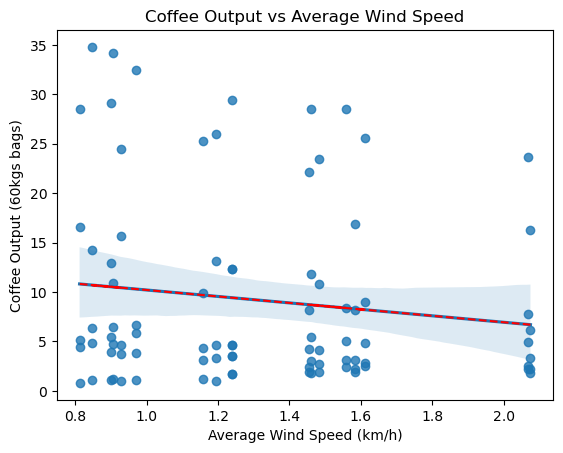

In [36]:
# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(combined_data_3['wind_avg'], combined_data_3['60kgs_bag'])
print(f"Pearson correlation coefficient between average wind speed and coffee output: {pearson_corr:.2f}")

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Calculate trendline slope and intercept
z = np.polyfit(combined_data_3['wind_avg'], combined_data_3['60kgs_bag'], 1)
p = np.poly1d(z)
slope = z[0]
intercept = z[1]
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")

# Plot scatter and trendline
sns.regplot(x='wind_avg', y='60kgs_bag', data=combined_data_3)
plt.plot(combined_data_3['wind_avg'], p(combined_data_3['wind_avg']), "r--")
plt.title('Coffee Output vs Average Wind Speed')
plt.xlabel('Average Wind Speed (km/h)')
plt.ylabel('Coffee Output (60kgs bags)')
plt.show()

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Each of these weather variables showed a moderate negative correlation with bearing trees. This suggests that as these weather conditions increase, the number of bearing trees tends to decrease:
- Temperature (temp_avg): r = -0.43
- Humidity (hum_min): r = -0.58
- Rainfall (rain_max): r = -0.33
- Wind (wind_avg): r = -0.60
All of these relationships were statistically significant, with p-values less than 0.05, meaning the patterns are unlikely due to random chance. The negative slopes from the trendlines also support this, indicating a downward trend in bearing trees as each weather factor increases.

Overall, the analysis suggests that harsher weather conditions may reduce the number of bearing coffee trees, potentially affecting yield.

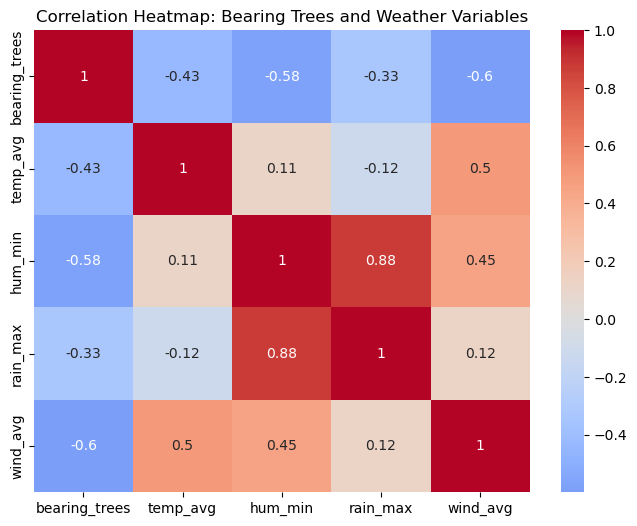

Relationship between temp_avg and bearing_trees:
- Pearson correlation coefficient: -0.427 (moderate negative relationship)
- p-value: 0.0000 (statistically significant)
- Trendline slope: -143.699

Relationship between hum_min and bearing_trees:
- Pearson correlation coefficient: -0.579 (moderate negative relationship)
- p-value: 0.0000 (statistically significant)
- Trendline slope: -34.586

Relationship between rain_max and bearing_trees:
- Pearson correlation coefficient: -0.327 (moderate negative relationship)
- p-value: 0.0018 (statistically significant)
- Trendline slope: -49.164

Relationship between wind_avg and bearing_trees:
- Pearson correlation coefficient: -0.599 (moderate negative relationship)
- p-value: 0.0000 (statistically significant)
- Trendline slope: -285.248



In [ ]:
### Heat map
# Select relevant columns
cols_to_check = ['bearing_trees', 'temp_avg', 'hum_min', 'rain_max', 'wind_avg']

# Calculate correlation matrix
corr_matrix = combined_data_3[cols_to_check].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Bearing Trees and Weather Variables')
plt.show()

# Calculate Pearson correlation coefficient and p-value
weather_cols = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg']
coffee_col = 'bearing_trees'

for col in weather_cols:
    corr, p_value = pearsonr(combined_data_3[coffee_col], combined_data_3[col])
    slope, intercept = np.polyfit(combined_data_3[col], combined_data_3[coffee_col], 1)
    direction = 'positive' if corr > 0 else 'negative'
    strength = ''
    abs_corr = abs(corr)
    if abs_corr < 0.3:
        strength = 'weak'
    elif abs_corr < 0.7:
        strength = 'moderate'
    else:
        strength = 'strong'

    significance = 'statistically significant' if p_value < 0.05 else 'not statistically significant'
    
    print(f"Relationship between {col} and {coffee_col}:")
    print(f"- Pearson correlation coefficient: {corr:.3f} ({strength} {direction} relationship)")
    print(f"- p-value: {p_value:.4f} ({significance})")
    print(f"- Trendline slope: {slope:.3f}")
    print("")

Which weather factor seems to influence coffee production the most? 

Based on the Pearson correlation analysis, average wind speed (wind_avg) shows the strongest relationship with coffee production when measured using the number of bearing trees. The correlation coefficient is -0.599, indicating a moderate negative relationship that is statistically significant. This suggests that as average wind speed increases, the number of bearing trees tends to decrease. Other weather variables like minimum humidity and average temperature also showed moderate negative relationships, but wind speed had the highest strength of association. This makes wind_avg the most influential weather factor among those examined in relation to coffee production.

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Based on my current data, weather conditions like wind and humidity seem to affect the number of bearing coffee trees, which are important for production. But these weather factors don’t show a strong direct link to how much coffee is actually produced.
To better understand the full picture, I would collect more detailed data like:
monthly or seasonal weather data (not just yearly averages) as well soil quality data (like nutrients and moisture). I would also like to further explore how the regression plot visuals did not match the slopes.


If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Based on the lab results, the best weather conditions for growing coffee are:
Cooler average temperatures – The data showed that higher temperatures were linked to fewer bearing trees, meaning cooler temps may be better for coffee growth.

Lower humidity – Minimum humidity had a strong negative relationship with production. Too much humidity might hurt the plants.

Less extreme rainfall – High maximum rainfall was connected to lower coffee output, so steady, moderate rain is likely better.

Lower wind speeds – Average wind speed had one of the strongest negative effects. Less wind may help protect the plants.

These patterns in the data suggest that coffee grows best in cooler, drier, and less windy environments with consistent rain.

